### EDA: Climate & Sales in Australia

**Background:**

An FMCG company P&J found that the sales of their best selling items are affected by the weather and rainfall trend. For example, the sale of tea increases when it rains, sunscreen is sold on the days when it is least likely to rain, and the sky is clear. They would like to check whether the weather patterns play a vital role in the sale of certain items. Hence as initial experimentation, they would like you to forecast the weather trend in the upcoming days. The target region for this activity is Australia; accordingly, this exercise will be based on analysing and cleaning the weather data from the Australian region available on public platforms.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings ('ignore')

In [2]:
data= pd.read_csv ('weatherdata.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0


In [3]:
data.shape

(142193, 9)

In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
dtypes: float64(6), object(3)
memory usage: 9.8+ MB


In [6]:
len(data)

142193

**Missing Values**

In [7]:
data.isna().sum()/len (data)*100

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
dtype: float64

In [8]:
# There are missing values in 4 columns but in our EDA each of these weather parameter is important,
# So we are not deleting any of these columns or rows    

In [9]:
# Checking Time duration


In [10]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0
...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0


📅Data Duration: Here we can see this data is from Decemmber 2008 to June 2017. (9 year)

In [11]:
 data['Month']= pd.to_datetime(data['Date']).dt.month

In [12]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,12


In [13]:
data["year"] = pd.to_datetime (data['Date']).dt.year

In [14]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Month,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,12,2008


In [15]:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

In [16]:
data ['Month_New'] = data ['Month'].map (month_map)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Month,year,Month_New
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,12,2008,Dec
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,12,2008,Dec
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,12,2008,Dec
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,12,2008,Dec
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,12,2008,Dec


**Temperature**

In [17]:
month_wise_Temp = data.groupby ('Month')['MaxTemp'].mean()
month_wise_Temp

Month
1     29.547362
2     28.877704
3     26.886744
4     23.611845
5     20.047202
6     17.324778
7     16.764242
8     18.258930
9     20.772510
10    23.540695
11    26.165571
12    27.526390
Name: MaxTemp, dtype: float64

<Axes: xlabel='Month'>

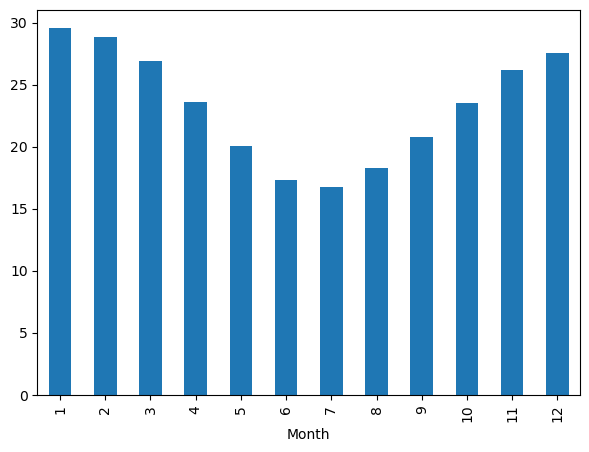

In [18]:
plt.figure (figsize= (7,5))
data.groupby ('Month')['MaxTemp'].mean().plot.bar()

Insight: In Nov, Dec, Jan, Feb there are highest temperature in  these months.

In [19]:
# Sunshine: More sunshine meaninig no railfall

high_sunshine = data[data['Sunshine']>5]
high_sunshine.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Month,year,Month_New
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,1,2009,Jan
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,1,2009,Jan
5941,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,1,2009,Jan
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,1,2009,Jan
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,1,2009,Jan


In [20]:
# Temperature

high_temp = data[data['MaxTemp']>35]
high_temp.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Month,year,Month_New
34,2009-01-05,Albury,12.9,35.8,0.0,NaN,NaN,WNW,41.0,1,2009,Jan
35,2009-01-06,Albury,13.7,37.9,0.0,NaN,NaN,W,52.0,1,2009,Jan
36,2009-01-07,Albury,16.1,38.9,0.0,NaN,NaN,W,57.0,1,2009,Jan
42,2009-01-13,Albury,17.2,37.7,0.0,NaN,NaN,NNW,35.0,1,2009,Jan
43,2009-01-14,Albury,17.4,43.0,0.0,NaN,NaN,NW,39.0,1,2009,Jan


In [21]:
# Temperature + Sunshine

high_temp_sun= data[(data['Sunshine']>5) & (data['MaxTemp']>35)]
high_temp_sun
             

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Month,year,Month_New
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,1,2009,Jan
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,1,2009,Jan
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,1,2009,Jan
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,1,2009,Jan
5948,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,1,2009,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...
138862,2016-10-17,Darwin,25.1,35.2,0.0,7.4,11.5,NNE,39.0,10,2016,Oct
138879,2016-11-03,Darwin,24.4,35.5,0.0,7.8,9.9,NW,35.0,11,2016,Nov
138892,2016-11-16,Darwin,25.7,35.2,0.0,5.4,11.3,NW,26.0,11,2016,Nov
138905,2016-11-29,Darwin,25.8,35.1,0.8,4.8,6.4,SSE,46.0,11,2016,Nov


Cold drink sales will increase on the days Temp. > 35  and sunshin > 5

In [22]:
b= data.groupby ('Month_New')['Sunshine'].mean().reset_index()

In [23]:
a= high_temp_sun.groupby ('Month_New')['MaxTemp'].aggregate(['min', 'mean', 'max'])


<Figure size 1500x700 with 0 Axes>

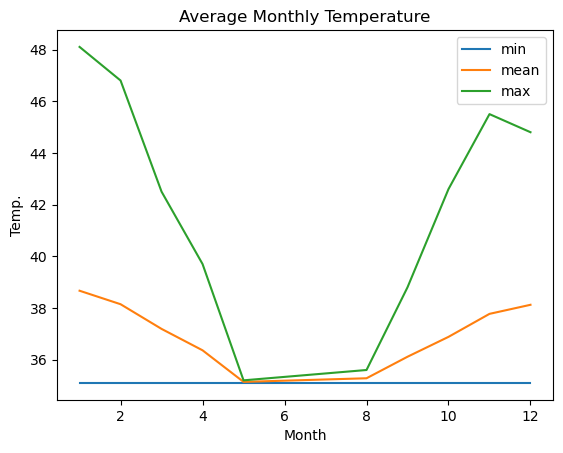

In [24]:
plt.figure (figsize= (15,7))
high_temp_sun.groupby ('Month')['MaxTemp'].aggregate(['min', 'mean', 'max']).plot.line()
plt.title('Average Monthly Temperature')
plt.ylabel ('Temp.')
plt.xlabel ('Month')
plt.show()

🔸Insight: January, February, March & October, November, December having high temperature and sunshine, 
So sunscreem, coldrinks can sell more than other season.

In [25]:
# fig, ax1 = plt.subplots(figsize=(15, 7))

# # Plot temperature data on primary y-axis
# smoothed_data.plot(ax=ax1)
# ax1.set_ylabel('Temperature (°C)')

# # Create a secondary y-axis for sunshine data
# ax2 = ax1.twinx()
# ax2.plot(sunshine_data, color='orange', linestyle='--')
# ax2.set_ylabel('Sunshine (hours)')

# plt.title('Average Monthly Temperature and Sunshine')
# plt.xlabel('Month')

# plt.show()

<Axes: xlabel='Month'>

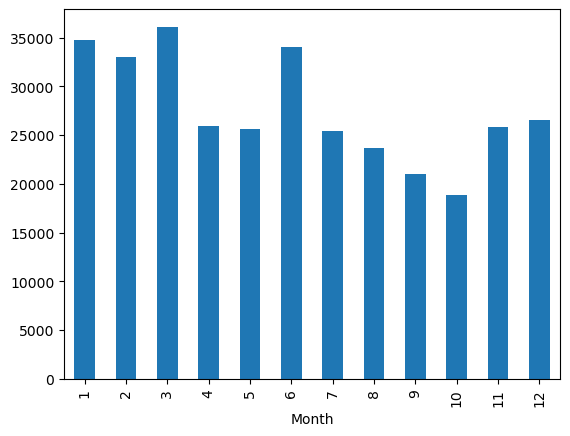

In [26]:
data.groupby('Month')['Rainfall'].sum().plot.bar()

In [27]:
# Insering Location dataframe

In [28]:
df_location= pd.read_csv('locationsandstates.csv')

In [29]:
df_location

,Location,State
0,Sydney,New South Wales
1,Albury,New South Wales
2,Armidale,New South Wales
3,Bathurst,New South Wales
4,Blue Mountains,New South Wales
...,...,...
71,Joondalup,Western Australia
72,Kalgoorlie,Western Australia
73,Karratha,Western Australia
74,Mandurah,Western Australia


In [30]:
# Merging dataframes

df_m = pd.merge(left= data, right=df_location, how='left', left_on= 'Location', right_on= 'Location')

In [31]:
df_m

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Month,year,Month_New,State
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,12,2008,Dec,New South Wales
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,12,2008,Dec,New South Wales
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,12,2008,Dec,New South Wales
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,12,2008,Dec,New South Wales
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,12,2008,Dec,New South Wales
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,6,2017,Jun,NaN
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,6,2017,Jun,NaN
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,6,2017,Jun,NaN
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,6,2017,Jun,NaN


In [32]:
month_rain = data.groupby('Month_New')['Rainfall'].sum()
month_rain

Month_New
Apr    25948.5
Aug    23640.9
Dec    26505.8
Feb    33045.3
Jan    34795.5
Jul    25410.8
Jun    34090.9
Mar    36094.8
May    25589.1
Nov    25811.7
Oct    18861.7
Sep    21050.8
Name: Rainfall, dtype: float64

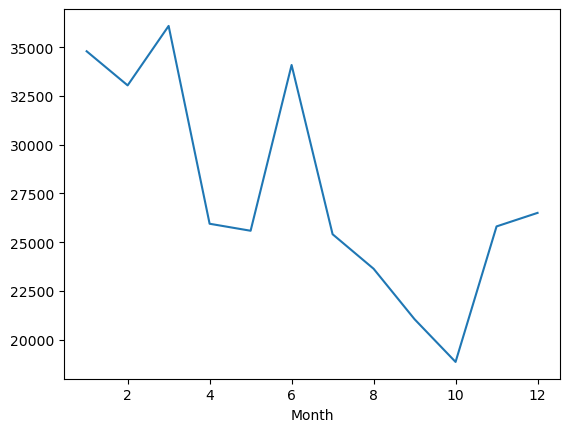

In [33]:
month_rain = data.groupby('Month')['Rainfall'].sum().plot.line()

Insight: IN January, February, March & June month there high rainfall.

❄Sometimes feeling cold is more than about low temperatures; a windy day can also make you cold. A factor called the chill factor can be used to quantify the cold based on the wind speed and the temperature. The formula for the chill factor is given by

$ WCI = (10 * \sqrt{v} - v + 10.5) .(33 - T_{m}) $

v is the speed of the wind and  𝑇𝑚
  is the minimum temperature

Add a column for WCI and find the month with the lowest WCI.

In [34]:
from math import sqrt

In [35]:
def 𝑊𝐶𝐼 (x):
    velocity = x['WindGustSpeed']
    mintemp = x['MinTemp']
    return ((10* sqrt(velocity)- velocity + 10.5) *(33-mintemp)    )

In [36]:
data['WCI']= data.apply(WCI, axis=1)

In [37]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'Month', 'year',
       'Month_New', 'WCI'],
      dtype='object')

In [38]:
# WCI

In [39]:
wci_data = data.groupby('Month')['WCI'].mean().reset_index()
wci_data

,Month,WCI
0,1,504.169996
1,2,511.722359
2,3,570.372892
3,4,680.791840
4,5,787.434259
5,6,845.755217
6,7,863.519699
7,8,836.501471
8,9,762.816683
9,10,697.875616


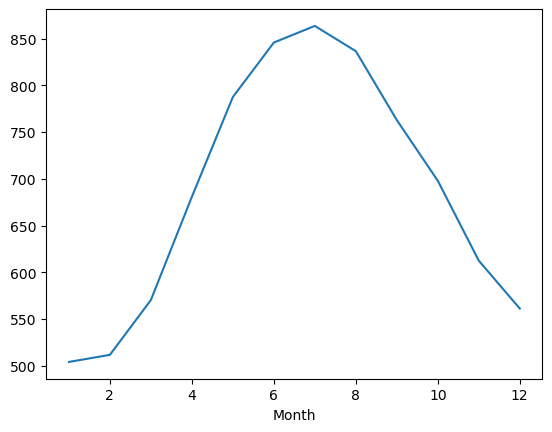

In [40]:
wci_data_plt = data.groupby('Month')['WCI'].mean().plot.line()

Insight: WCI is showing differant than the only rainfall parameter which we see before,
        Here **May to September** having, So tea sell can be increase in this season

In [41]:
# For Referance

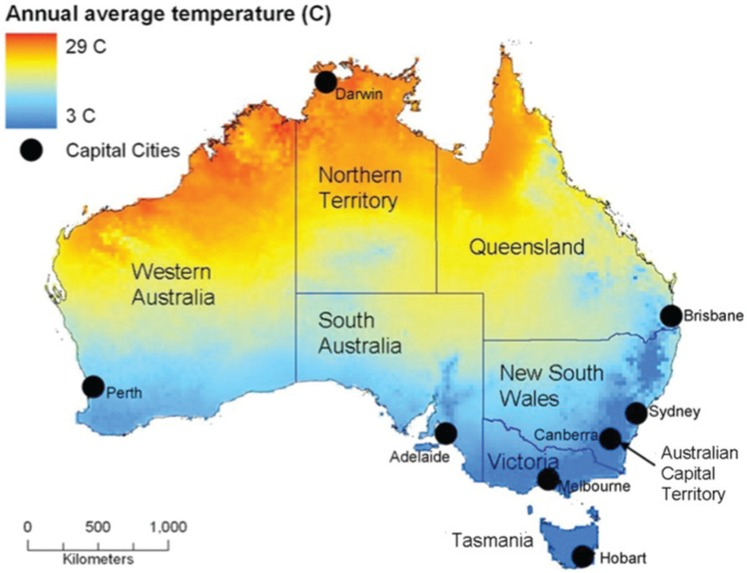